In [1]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv("gender_submission.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#clean data
train.drop(columns=['Cabin','Name','Ticket'],inplace=True,axis =1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


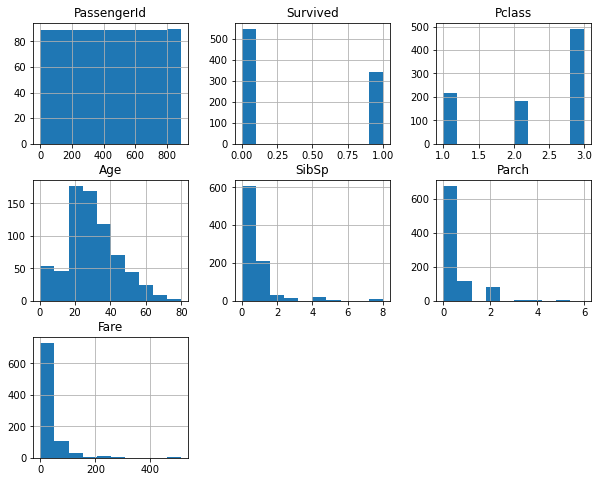

In [7]:
#visualize data
train.hist(figsize=(10,8));

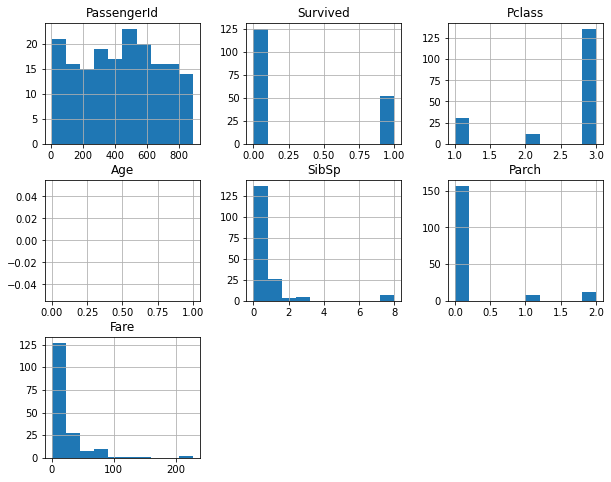

In [8]:
train[train.Age.isnull()].hist(figsize=(10,8));

In [9]:
train.fillna(train.mean(), inplace=True)

C:\Users\AhmedAdelBadr\AppData\Local\Temp\ipykernel_11452\1059553085.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [11]:
train.dropna(inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [13]:
survived = train.Survived == True
died = train.Survived == False
train.Fare[survived].mean()


48.209498235294106

In [14]:
train.Fare[died].mean()

22.117886885245877

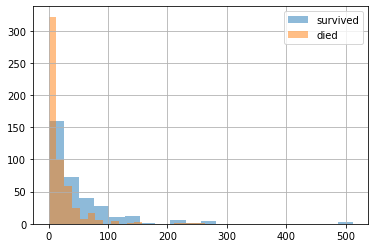

In [15]:
train.Fare[survived].hist(alpha=0.5, bins=20, label='survived')
train.Fare[died].hist(alpha=0.5, bins=20, label='died')
plt.legend();

In [16]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

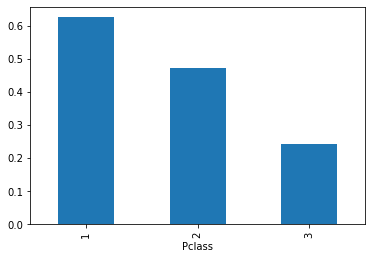

In [17]:
train.groupby('Pclass').Survived.mean().plot(kind= 'bar');

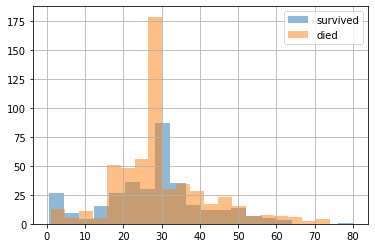

In [18]:
train.Age[survived].hist(alpha=0.5, bins=20, label='survived')
train.Age[died].hist(alpha=0.5, bins=20, label='died')
plt.legend();

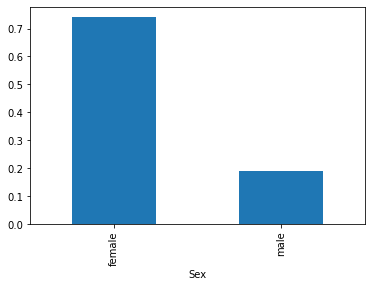

In [19]:
train.groupby('Sex').Survived.mean().plot(kind= 'bar');

In [20]:
train.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [21]:
train.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [22]:
train.query('Sex == "female"')['Fare'].median(), train.query('Sex == "male"')['Fare'].median()

(23.0, 10.5)

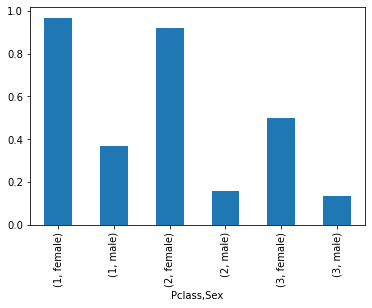

In [23]:
train.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind='bar');

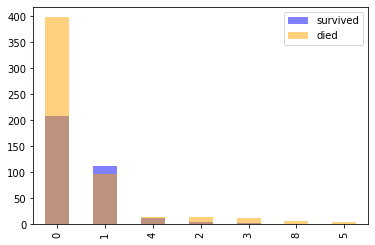

In [24]:
train.SibSp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
train.SibSp[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
test.drop(columns=['Cabin','Name','Ticket'],inplace=True,axis =1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [28]:
test.fillna(train.mean(), inplace=True)

C:\Users\AhmedAdelBadr\AppData\Local\Temp\ipykernel_11452\1002868538.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(train.mean(), inplace=True)


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [31]:
#create dummies for categorical values to add to features
train[['male','female']] = pd.get_dummies(train['Sex'])
train[['embarked1','embarked2','embarked3']] = pd.get_dummies(train['Embarked'])
test[['male','female']] = pd.get_dummies(test['Sex'])
test[['embarked1','embarked2','embarked3']] = pd.get_dummies(test['Embarked'])

In [32]:
train.drop(columns=['Sex','Embarked'],inplace=True,axis =1)
test.drop(columns=['Sex','Embarked'],inplace=True,axis =1)

In [33]:
#split data
from sklearn.model_selection import train_test_split

In [34]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

711 711 178 178


In [37]:
#start machine learning using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [38]:
model.fit(X_train,y_train)

C:\Users\AhmedAdelBadr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predictions=model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [42]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.797752808988764
0.7391304347826086
0.7391304347826086
0.7391304347826085


In [43]:
#start machine learning using Randon forest
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier()

In [44]:
model_2.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
predictions_2=model_2.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, predictions_2)
precision = precision_score(y_test, predictions_2)
recall = recall_score(y_test, predictions_2)
f1 = f1_score(y_test, predictions_2)

In [47]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8033707865168539
0.75
0.7391304347826086
0.7445255474452556


In [48]:
#start machine learning using Decision Tree
from sklearn import tree
model_3=tree.DecisionTreeClassifier()
model_3.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
predictions_3=model_3.predict(X_test)


In [50]:
accuracy = accuracy_score(y_test, predictions_3)
precision = precision_score(y_test, predictions_3)
recall = recall_score(y_test, predictions_3)
f1 = f1_score(y_test, predictions_3)

In [51]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.7471910112359551
0.65
0.7536231884057971
0.697986577181208


In [52]:
#predict testing data by using logistic regression
model_final=LogisticRegression()
model_final.fit(X,y)

C:\Users\AhmedAdelBadr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
pred=model_final.predict(test)

In [54]:
submission=pd.DataFrame({"PassengerId": gender_submission["PassengerId"],"Survived":pred})

In [55]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
#write the output prediction excel
submission.to_csv('submission.csv',index=False)